# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [161]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

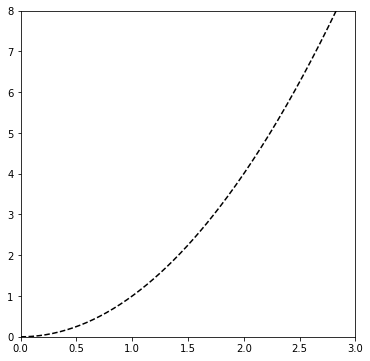

In [162]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

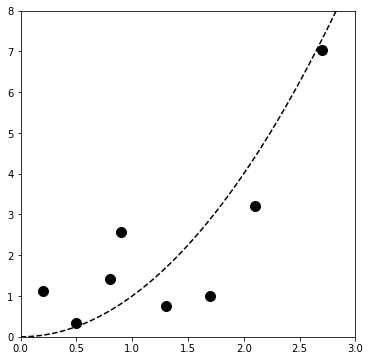

In [163]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [164]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[1.9925512]
-0.36159215764761976


Definiujemy naszą funkcję regresji

In [165]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

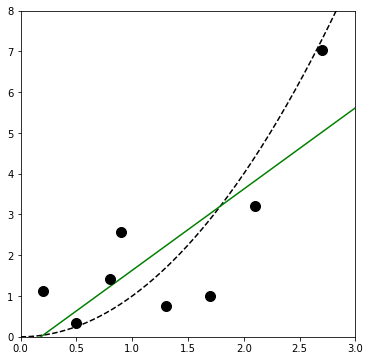

In [166]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [167]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

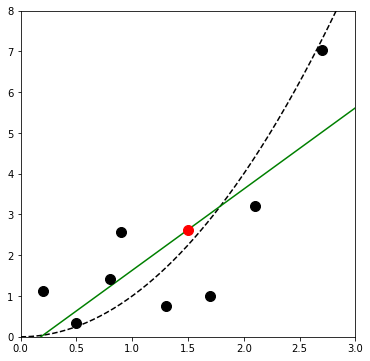

In [168]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [169]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.5992274270194573
0.331184530431165


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [170]:
deg=1
xx=np.vander(x, deg + 1)
xx

array([[0.2, 1. ],
       [0.5, 1. ],
       [0.8, 1. ],
       [0.9, 1. ],
       [1.3, 1. ],
       [1.7, 1. ],
       [2.1, 1. ],
       [2.7, 1. ]])

In [171]:
np.linalg.solve(xx.T @ xx, xx.T @ y)

array([ 1.9925512 , -0.36159216])

# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [172]:
from scipy import optimize
def f(pair):
    x,y = pair
    return (x+1)**2 + y**2
optimize.fmin_cg(f, x0=[(100,100)])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 36
         Gradient evaluations: 9


array([-9.99999996e-01,  3.67567063e-09])

# Zadanie 3
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [173]:
import numpy as np
def compute_error(ab, xy):
    a, b = ab
    x, y = xy
    return sum([(yi - (a*xi + b))**2 for xi, yi in zip(x, y)])

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [174]:
from functools import partial
fun = partial(compute_error, xy=(x,y))
optimize.fmin_cg(fun, x0=(0, 1))

Optimization terminated successfully.
         Current function value: 13.316688
         Iterations: 4
         Function evaluations: 32
         Gradient evaluations: 8


array([ 1.99255119, -0.36159217])

# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [175]:
def compute_error_1(ab, xy):
    a, b = ab
    x, y = xy
    return sum([np.abs(yi - (a*xi + b)) for xi, yi in zip(x, y)])

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [176]:
fun = partial(compute_error_1, xy=(x,y))
optimize.fmin_cg(fun, x0=(0, 1))

         Current function value: 8.759844
         Iterations: 5
         Function evaluations: 544
         Gradient evaluations: 133


array([ 1.81652116, -0.61432328])

# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


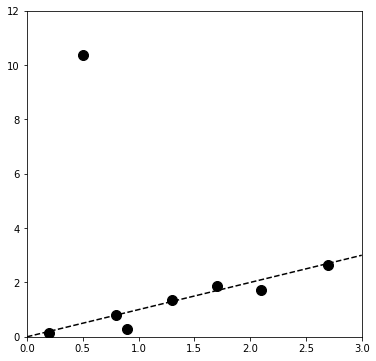

In [177]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [178]:
fun0 = partial(compute_error, xy=(x,y))
fun1 = partial(compute_error_1, xy=(x,y))
res0 = optimize.fmin_cg(fun0, x0=(0, 0))
res1 = optimize.fmin_cg(fun1, x0=(0, 0))
print(res0, res1)
print(fun(res0), fun1(res1))

Optimization terminated successfully.
         Current function value: 76.136189
         Iterations: 7
         Function evaluations: 76
         Gradient evaluations: 19
         Current function value: 11.591777
         Iterations: 3
         Function evaluations: 282
         Gradient evaluations: 69
[-0.5370762   3.08729398] [0.7597796 0.2602231]
15.060814967125067 11.591777020135368


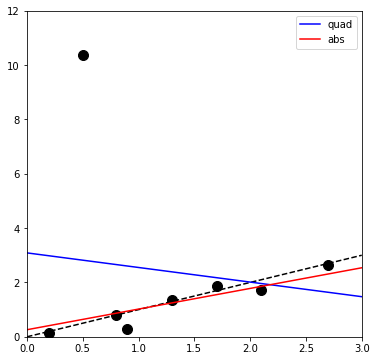

In [179]:
def fun(a, b):
    return lambda x: a*x + b
f0 = fun(*res0)
f1  = fun(*res1)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k')
plt.plot(x, y, 'ok', ms=10);
plt.plot(x_tr, f0(x_tr), color='blue', label='quad')
plt.plot(x_tr, f1(x_tr), color='red', label='abs')
plt.legend()
plt.show()